In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=100,n_features=3,centers=2,random_state=101)

In [5]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
scaled_data = scaler.fit_transform(data[0])

In [9]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [10]:
from mpl_toolkits.mplot3d import Axes3D

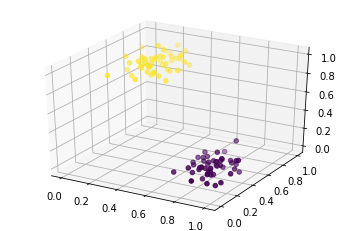

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [14]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [15]:
learning_rate = 0.01

In [16]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [17]:
hidden = fully_connected(X,num_hidden,activation_fn=None)
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [18]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [22]:
num_steps = 1000

with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data})

In [23]:
output_2d

array([[-0.05546147,  0.569088  ],
       [-0.0644384 ,  0.5416293 ],
       [ 0.3892992 , -0.600986  ],
       [ 0.09316301,  0.52875006],
       [ 0.60275847, -0.6518667 ],
       [-0.07774636,  0.69071484],
       [-0.14512715,  0.6082057 ],
       [ 0.02213192,  0.6919384 ],
       [ 0.6306136 , -0.6174778 ],
       [ 0.42384326, -0.6957197 ],
       [ 0.36062855, -0.6625008 ],
       [ 0.12881511,  0.637534  ],
       [ 0.08027345,  0.40670136],
       [-0.05816031,  0.45707926],
       [-0.10861641,  0.37388888],
       [ 0.10302645,  0.35737243],
       [ 0.06697631,  0.53944695],
       [ 0.45950967, -0.6283113 ],
       [ 0.14670438,  0.65533125],
       [ 0.07966155,  0.5101361 ],
       [ 0.11866277,  0.5268084 ],
       [ 0.5649417 , -0.7062133 ],
       [ 0.06277221,  0.48237792],
       [ 0.03645802,  0.5362977 ],
       [ 0.11621827, -0.78500116],
       [ 0.5077209 , -0.6036062 ],
       [-0.11473423,  0.67316663],
       [ 0.3368715 , -0.5795818 ],
       [ 0.2557667 ,

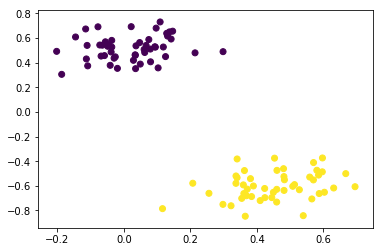

In [26]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])